In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing
import gc

from psutil import virtual_memory
from os import scandir

In [2]:
folder = "../../Deidentified-Raw-Waveforms/"
file1 = "raw_waves_data_2a.csv"
file2 = "raw_waves_data_2b.csv"
file3 = "raw_waves_data_2c.csv"
file4 = "raw_waves_data_2d.csv"
file5 = "raw_waves_data_2e.csv"
coldict = {
    "raw_waves_data_2a.csv": ["time", "257", "258"], 
    "raw_waves_data_2b.csv": ["time", "258"], 
    "raw_waves_data_2c.csv": ["time", "257"], 
    "raw_waves_data_2d.csv": ["time", "257", "258"], 
    "raw_waves_data_2e.csv": ["time", "257", "258"]
}

In [3]:
%matplotlib widget

In [4]:
df = pd.read_csv(folder+file1, usecols=coldict[file1])

In [7]:
signal = pd.Series(df["258"])
signal = signal.combine_first(df["257"])

In [8]:
del df
gc.collect()
virtual_memory()

svmem(total=12655771648, available=7178854400, percent=43.3, used=5476917248, free=7178854400)

In [27]:
virtual_memory()

svmem(total=12655771648, available=1544081408, percent=87.8, used=11111690240, free=1544081408)

In [7]:
filt = (abs(signal) <= 25)
signal = signal*filt

In [9]:
signal = signal.fillna(0)

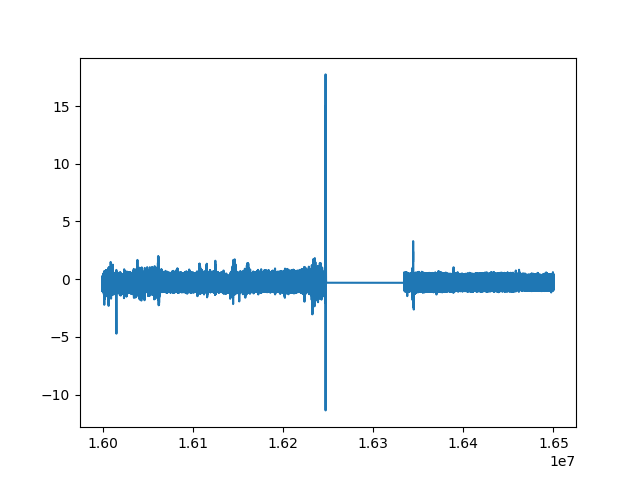

In [9]:
plt.plot(signal)

In [10]:
freq=250 # This is just a guess

In [24]:
virtual_memory()

svmem(total=12655771648, available=5060788224, percent=60.0, used=7594983424, free=5060788224)

In [34]:
del signal
gc.collect()
virtual_memory()

svmem(total=12655771648, available=2106351616, percent=83.4, used=10549420032, free=2106351616)

In [11]:
del df
gc.collect()
print(virtual_memory())
print(signal)

svmem(total=12655771648, available=5380919296, percent=57.5, used=7274852352, free=5380919296)
0          -0.1489
1          -0.1489
2          -0.1489
3          -0.1693
4          -0.1999
             ...  
64791742   -0.4957
64791743   -0.5263
64791744   -0.5569
64791745   -0.5824
64791746   -0.5977
Name: 258, Length: 64791747, dtype: float64


In [11]:
xqrs = processing.XQRS(sig=signal, fs=freq)
xqrs.detect()

Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...


KeyboardInterrupt: 

In [15]:
virtual_memory()

svmem(total=12655771648, available=8040738816, percent=36.5, used=4615032832, free=8040738816)

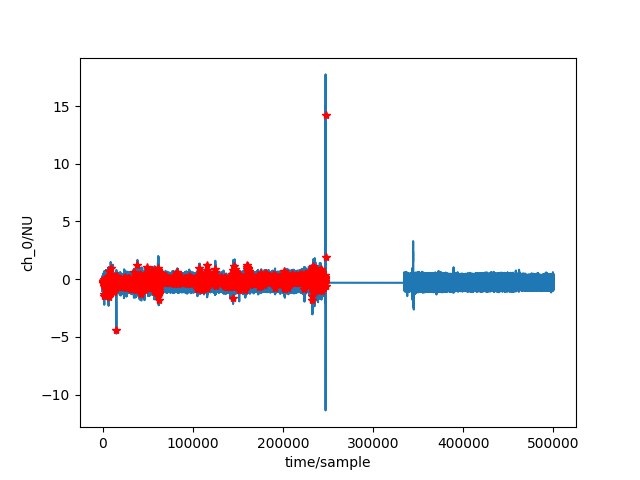

In [ ]:
wfdb.plot_items(signal=np.array(signal).reshape(len(signal), 1), ann_samp=[xqrs.qrs_inds])

In [32]:
gc.collect()
virtual_memory()

svmem(total=12655771648, available=2298859520, percent=81.8, used=10356912128, free=2298859520)

In [14]:
xqrs.qrs_inds

array([   112,    199,    286, ..., 247257, 247335, 247526])

In [39]:
plt.plot(signal2.loc[0:10000])
plt.show()

MemoryError: Unable to allocate 989. MiB for an array with shape (2, 64791747) and data type float64

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis, CTRL fixes aspect', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))